<a href="https://colab.research.google.com/github/SergeyShchus/Automatic_GIS/blob/master/Notebook/Geopandas/install%20geopandas_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%%time 
!apt update
!apt upgrade
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 



Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [564 B]
Get:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [819 B]
Get:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [70.9 kB]
Hit:11 http://archive.ubuntu.com/ubuntu bionic

In [0]:
import os
import geopandas as gpd

In [0]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

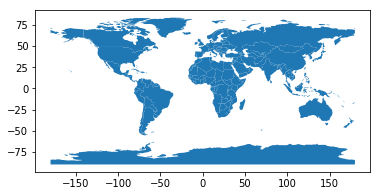

In [0]:
world.plot()

In [0]:
test = gpd.sjoin(left_df=world,
                 right_df=cities,
                 how="inner",
                 op="intersects")

In [0]:
test.head()

,pop_est,continent,name_left,iso_a3,gdp_md_est,geometry,index_right,name_right
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180 -16.06713266364245, 180 -1...",91,Suva
1,53950935,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...,144,Dar es Salaam
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84 49.00000000000011, -12...",101,Ottawa
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84 49.00000000000011, -12...",186,"Washington, D.C."
5,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997033076265 49.21498078062912,...",96,Astana


In [0]:
fp = "/content/TravelTimes_to_5975375_RailwayStation.shp"

# Read the GeoJSON file similarly as Shapefile
acc = gpd.read_file(fp)

# Let's see what we have
print(acc.head(2))

   car_m_d  car_m_t  ...  walk_t                                           geometry
0    32297       43  ...     459  POLYGON ((382000.0001358641 6697750.000038058,...
1    32508       43  ...     422  POLYGON ((382250.0001358146 6697750.000038053,...

[2 rows x 15 columns]


In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import geopandas as gpd

fp = "/content/drive/My Drive/Colab Notebooks/data/2018-master/data/TravelTimes_to_5975375_RailwayStation_Helsinki.geojson"

# Read the GeoJSON file similarly as Shapefile
acc = gpd.read_file(fp)

# Let's see what we have
print(acc.head(2))

   car_m_d  ...                                           geometry
0    15981  ...  POLYGON ((391000.0001349226 6667750.00004299, ...
1    16190  ...  POLYGON ((390750.0001349644 6668000.000042951,...

[2 rows x 20 columns]


In [0]:
# Include only data that is above or equal to 0
acc = acc.loc[acc['pt_r_tt'] >=0]

In [0]:

%matplotlib inline
import matplotlib.pyplot as plt


ImportError: ignored

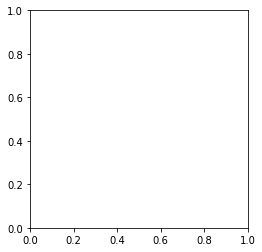

In [0]:
# Plot using 9 classes and classify the values using "Fisher Jenks" classification
acc.plot(column="pt_r_tt", scheme="Fisher_Jenks", k=9, cmap="RdYlBu", linewidth=0, legend=True)

# Use tight layout
plt.tight_layout()